In [1]:
# clean data func
import re
import gensim

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

# improve clean func, a & empty lines left now
def clean_data(val):
    "Remove chars that are not letters or numbers, downcase, then remove stop words"
    global cnt, lenght
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    gensim.parsing.preprocessing.strip_multiple_whitespaces(sentence)
    gensim.parsing.preprocessing.remove_stopwords(sentence)
    return sentence

/Users/alinakrivolapova/projects/my_ds_project/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# read and clean initial data
import pandas as pd

header_list = ["sentiment", "text"]
initial_data = pd.read_csv('./finantial_news_data.csv', names = header_list)
initial_data = initial_data.dropna(how="any")
initial_data['text'] = initial_data['text'].apply(clean_data)

# divide initial data to separate DataFrames
positive_news = []
negative_news = []
neutral_news = []

for index, element in initial_data.iterrows():
    if element['sentiment'] == 'positive':
        positive_news.append(element.values)
    elif element['sentiment'] == 'negative':
        negative_news.append(element.values)
    elif element['sentiment'] == 'neutral':
        neutral_news.append(element.values)

positive = pd.DataFrame(positive_news, columns=header_list)
negative = pd.DataFrame(negative_news, columns=header_list)
neutral = pd.DataFrame(neutral_news, columns=header_list)

In [3]:
neutral

,sentiment,text
0,neutral,according to gran the company has no plans to...
1,neutral,technopolis plans to develop in stages an area...
2,neutral,at the request of finnish media company alma m...
3,neutral,in sweden gallerix accumulated sek denominate...
4,neutral,the company supports its global customers in d...
...,...,...
2874,neutral,nevertheless the development can not be allow...
2875,neutral,besides as there is no depositor preference i...
2876,neutral,it holds 38 percent of outokumpu s shares and ...
2877,neutral,mobile communication and wireless broadband pr...


In [4]:
# save cleaned data
with open("./cleaned_initial_data.csv","w") as file:
    for x,y in zip(initial_data['sentiment'], initial_data['text']):
        file.writelines(','.join([x,y]) + '\n')

In [7]:
import numpy as np
# form balanced dataset
#sample_size = min(positive.shape[0], negative.shape[0], neutral.shape[0])
#raw_data = np.concatenate((positive['text'].values[:sample_size],
#                           negative['text'].values[:sample_size],
#                           neutral['text'].values[:sample_size]), axis=0)
# positive = 2 , negative = 1, neutral = 0
# labels = [2] * sample_size + [1] * sample_size + [0] * sample_size

sample_size = min(positive.shape[0], negative.shape[0])
raw_data = np.concatenate((positive['text'].values[:sample_size],
                           negative['text'].values[:sample_size]), axis=0)
# positive = 1 , negative = 0
labels = [1] * sample_size + [0] * sample_size

In [8]:
# divide data to training & test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(raw_data, labels, test_size=0.2, random_state=1)

In [9]:
# filter real data
real_data = pd.read_csv('./mydump_with_date.csv', names = ["date","text"])
# drop empty data
real_data = real_data.dropna(how="any")  
real_data['text'] = real_data['text'].apply(clean_data)
real_data

,date,text
1,2021-05-13 00:00:00.000000,elon musk moves in mysterious ways so it would...
2,2021-06-14 00:00:00.000000,the price of bitcoin hit a threeweek high on m...
3,2021-06-02 00:00:00.000000,the us securities watchdog told tesla last yea...
4,2021-05-26 00:00:00.000000,german police are investigating whether a fire...
5,2021-05-15 00:00:00.000000,the driver of a tesla car in a fatal crash tha...
...,...,...
140,2020-01-19 00:00:00.000000,spacex has completed its last big test of its ...
141,2020-02-04 00:00:00.000000,tesla shares have soared 40 in two days after ...
142,2020-01-05 00:00:00.000000,followers of elon musk are used to big claims ...
143,2020-02-04 00:00:00.000000,elon musks spaceships to mars can wait his tes...


In [10]:
# build corpus
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in real_data['text'].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(real_data)

In [74]:
# corpus

In [12]:
import logging
import multiprocessing
import time
import gensim
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# https://habr.com/en/company/mailru/blog/417767/
# https://m.habr.com/ru/post/446530/

# add logging to check errors during learning
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# use real data
#data = gensim.models.word2vec.LineSentence('mydump.csv')

# learning
# size of space 200, number of words in line 5, min frequency 3
#model = Word2Vec(real_data, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())
v2w_model = Word2Vec(corpus, vector_size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())
v2w_model.save("models/model.w2v")

2021-07-30 20:16:20,598 : INFO : collecting all words and their counts
2021-07-30 20:16:20,598 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-30 20:16:20,618 : INFO : collected 14269 word types from a corpus of 103806 raw words and 144 sentences
2021-07-30 20:16:20,619 : INFO : Creating a fresh vocabulary
2021-07-30 20:16:20,691 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 retains 4118 unique words (28.859765926133576%% of original 14269, drops 10151)', 'datetime': '2021-07-30T20:16:20.645085', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3ab5921f, Feb 24 2020, 17:52:18) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-07-30 20:16:20,692 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=3 leaves 91683 word corpus (88.32148430726548%% of original 103806, drops 12123)', 'datetime': '2021-07-30T20:16:20.692419', 'gensim': '4.0.1', 'python': '3.8.2 (v3.8.2:7b3

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4118 samples in 0.001s...
[t-SNE] Computed neighbors for 4118 samples in 0.444s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4118
[t-SNE] Computed conditional probabilities for sample 2000 / 4118
[t-SNE] Computed conditional probabilities for sample 3000 / 4118
[t-SNE] Computed conditional probabilities for sample 4000 / 4118
[t-SNE] Computed conditional probabilities for sample 4118 / 4118
[t-SNE] Mean sigma: 0.013600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.990822
[t-SNE] KL divergence after 300 iterations: 1.468920
t-SNE done! Time elapsed: 5.368093252182007 se conds


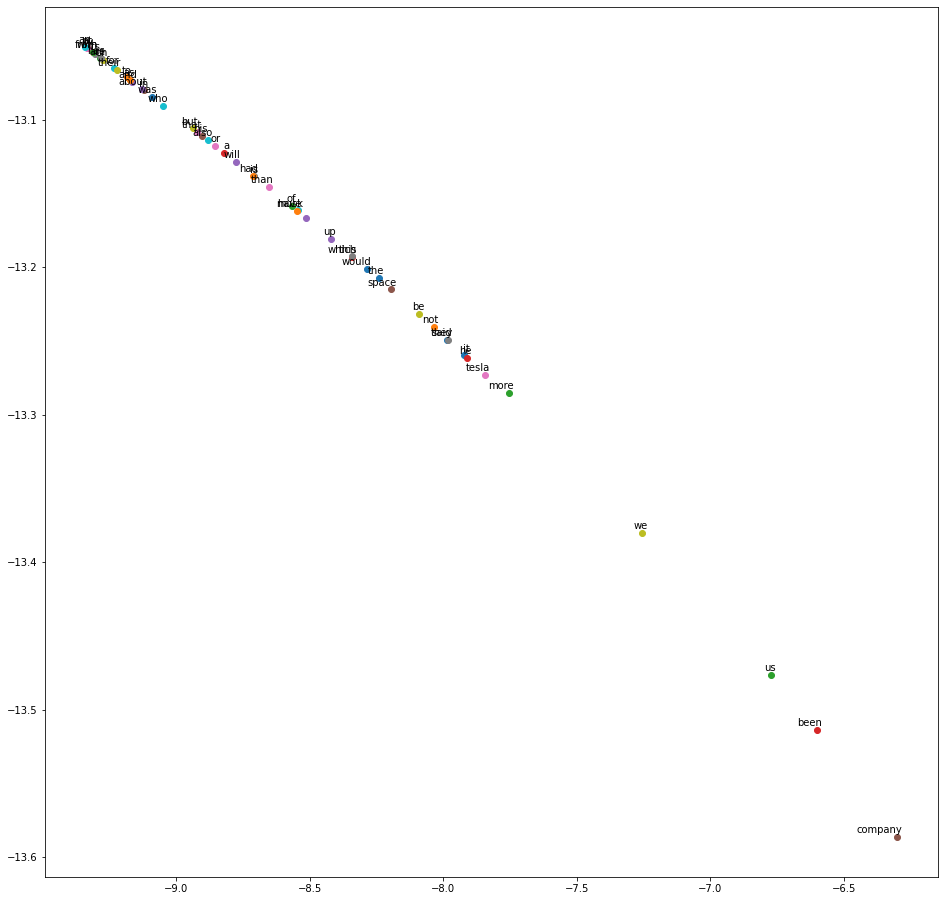

In [13]:
# visualization
# https://habr.com/en/post/267041/
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

# TSNE works by taking a group of high-dimensional vocabulary word feature vectors, 
# then compresses them down to 2-dimensional x,y coordinate pairs. 
# The idea is to keep similar words close together on the plane, 
# while maximizing the distance between dissimilar words.

labels = []
tokens = []

for word in v2w_model.wv.index_to_key:
    tokens.append(v2w_model.wv.get_vector(word))
    labels.append(word)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tokens)
print('t-SNE done! Time elapsed: {} se conds'.format(time.time()-time_start))

x = []
y = []
for value in tsne_results:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
#for i in range(len(x)):
# just to improve perf
for i in range(50):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')


<AxesSubplot:>

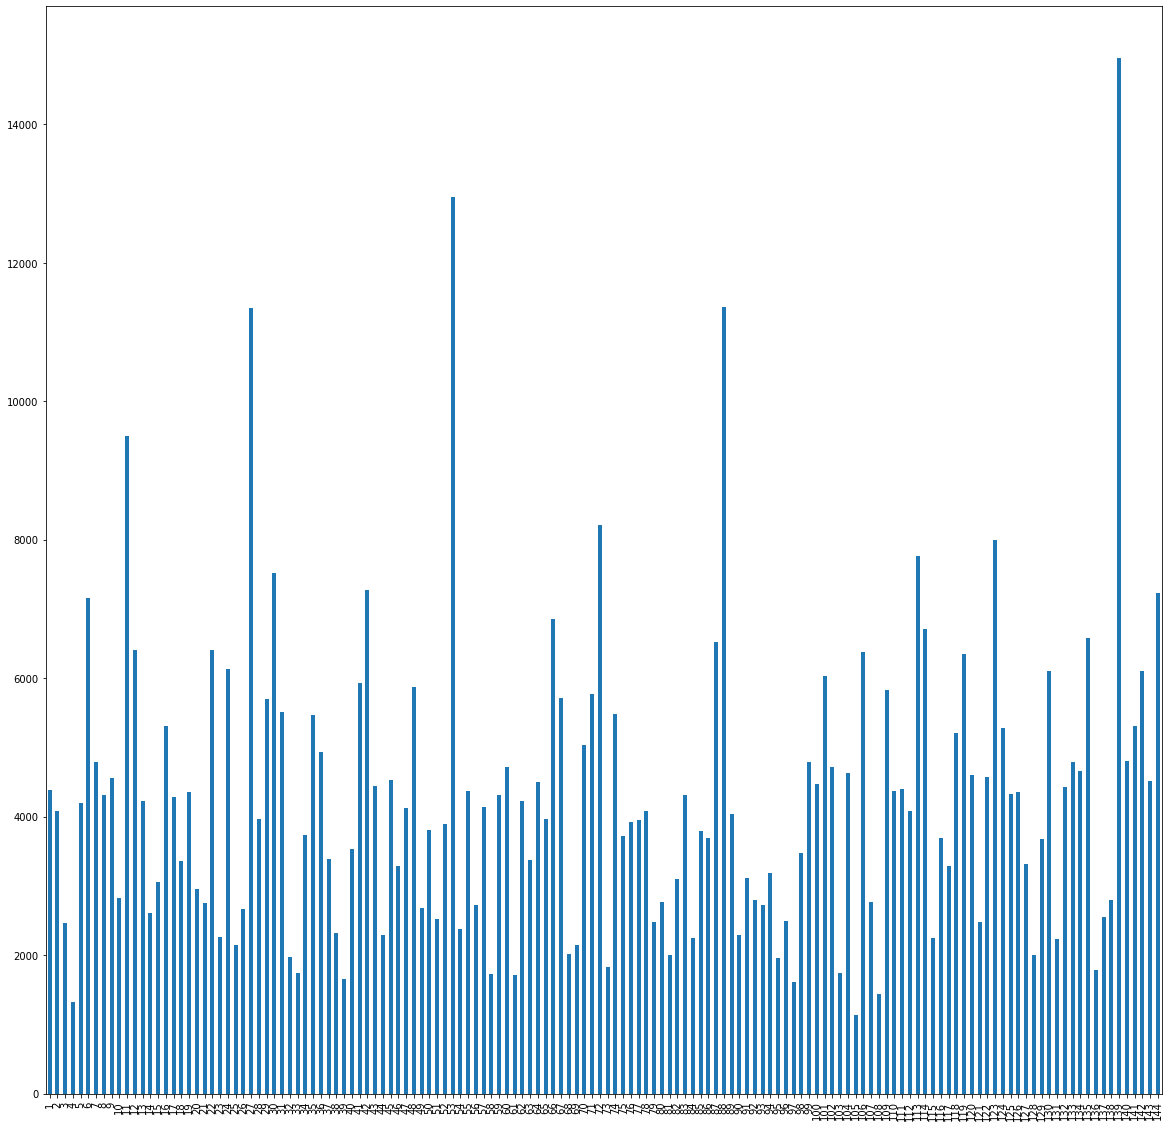

In [15]:
# find the size of vector which covers most cases
import matplotlib.pyplot as plt

# all lines lenght
plt.figure(figsize=(20, 20))
real_data['text'].str.len().plot(kind="bar")

Text(0, 0.5, 'frequency')

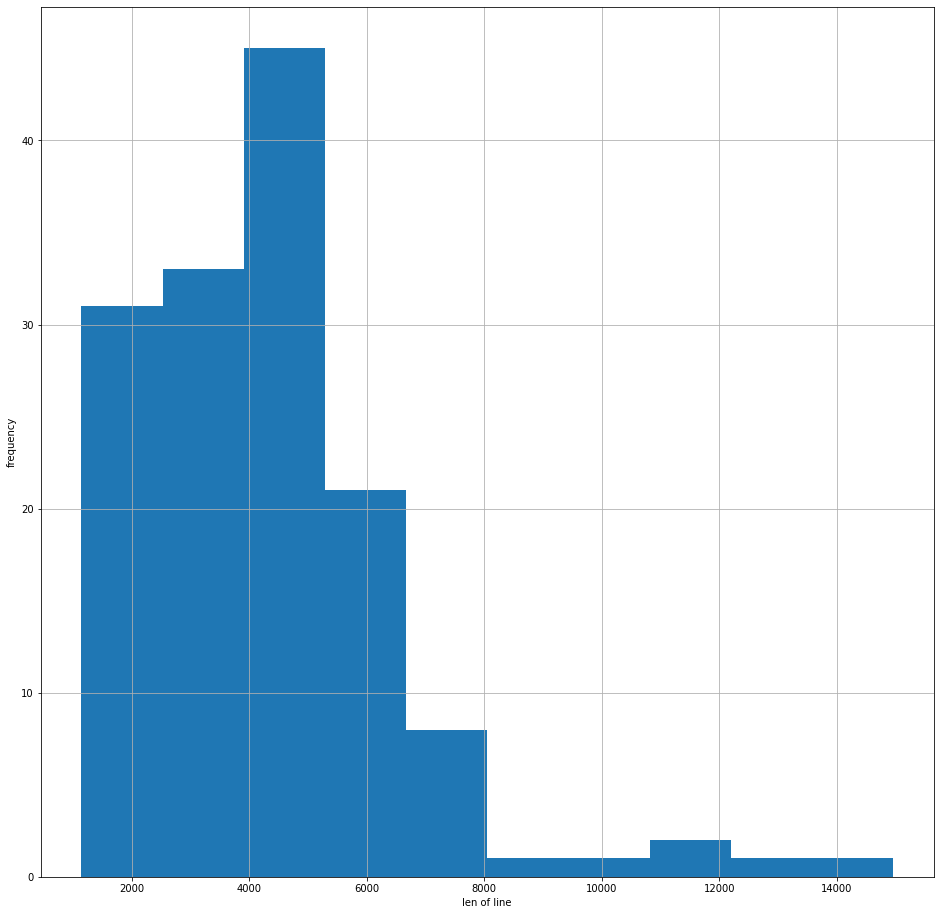

In [16]:
# len frequency
plt.figure(figsize=(16, 16))

ax = real_data['text'].str.len().hist()
ax.set_xlabel("len of line")
ax.set_ylabel("frequency")

In [17]:
# matrix heigh (max words count)
# based on plot above
SENTENCE_LENGTH = 8000 

#output_dim: int >= 0. size of embedding dense
OUTPUT_DIM = 100 # because of the GLOVE size

DIM = v2w_model.vector_size 
# Use NUM=100000 most frequent words from model
NUM = 100000

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=SENTENCE_LENGTH)

# create and train tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

# reflect each text into token ids array
x_train_seq = get_sequences(tokenizer, x_train)
x_test_seq = get_sequences(tokenizer, x_test)

# change type to be np.asarray
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [19]:
# prepare embadding layer using v2w model

embedding_matrix = np.zeros((NUM, DIM))

# add NUM of words from word2Vec model into embedding layer
for word, i in tokenizer.word_index.items():
    if i >= NUM:
        break
    if word in v2w_model.wv.index_to_key:
        embedding_matrix[i] = v2w_model.wv[word]

In [20]:
from keras.layers import Input
from keras.layers.embeddings import Embedding

# main layer (our data)
news_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
# embedding layer: will code input data (news_input) to vector sequence 
news_encoder = Embedding(NUM, DIM, input_length=SENTENCE_LENGTH,
                          weights=[embedding_matrix], trainable=False)(news_input)

In [21]:
# existed keras code which is removed in newer version
from keras import backend as K


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [22]:
from keras import optimizers
from keras.layers import Dense, concatenate, Activation, Dropout
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import GlobalMaxPooling1D

# TODO: read about that 
branches = []
# regulation
x = Dropout(0.2)(news_encoder)

# h=(2, 3, 4, 5) filters
# 10 layers for each
for size, filters_count in [(2, 10), (3, 10), (4, 10), (5, 10)]:
    for i in range(filters_count):
        branch = Conv1D(filters=1, kernel_size=size, padding='valid', activation='relu')(x)
        # find most relevant grams
        branch = GlobalMaxPooling1D()(branch)
        branches.append(branch)

# create 1 common layer
x = concatenate(branches, axis=1)
# regulation
x = Dropout(0.2)(x)
# base layer with 30 units output
x = Dense(30, activation='relu')(x)
x = Dense(1)(x)
output = Activation('sigmoid')(x)

model = Model(inputs=[news_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision, recall, f1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 8000, 200)    20000000    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 8000, 200)    0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 7999, 1)      401         dropout[0][0]                    
______________________________________________________________________________________________

In [36]:
from keras.callbacks import ModelCheckpoint

# use 5 epoch just to be more fast
checkpoint = ModelCheckpoint("models/cnn-frozen-embeddings-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max')
history = model.fit(x_train_seq, y_train, batch_size=32, epochs=5, validation_split=0.25, callbacks = [checkpoint])

Epoch 1/5
23/23 [==============================] - 126s 5s/step - loss: 0.6888 - precision: 0.5321 - recall: 0.6474 - f1: 0.5792 - val_loss: 0.6932 - val_precision: 0.5097 - val_recall: 0.5972 - val_f1: 0.5475
Epoch 2/5
23/23 [==============================] - 130s 6s/step - loss: 0.6872 - precision: 0.5469 - recall: 0.6014 - f1: 0.5636 - val_loss: 0.6958 - val_precision: 0.4898 - val_recall: 0.6698 - val_f1: 0.5641
Epoch 3/5
23/23 [==============================] - 129s 6s/step - loss: 0.6920 - precision: 0.5051 - recall: 0.5351 - f1: 0.5084 - val_loss: 0.6923 - val_precision: 0.5364 - val_recall: 0.6368 - val_f1: 0.5794
Epoch 4/5
23/23 [==============================] - 129s 6s/step - loss: 0.6839 - precision: 0.5665 - recall: 0.6965 - f1: 0.6132 - val_loss: 0.6920 - val_precision: 0.5805 - val_recall: 0.4002 - val_f1: 0.4679
Epoch 5/5
23/23 [==============================] - 131s 6s/step - loss: 0.6862 - precision: 0.5643 - recall: 0.5466 - f1: 0.5443 - val_loss: 0.6928 - val_precis

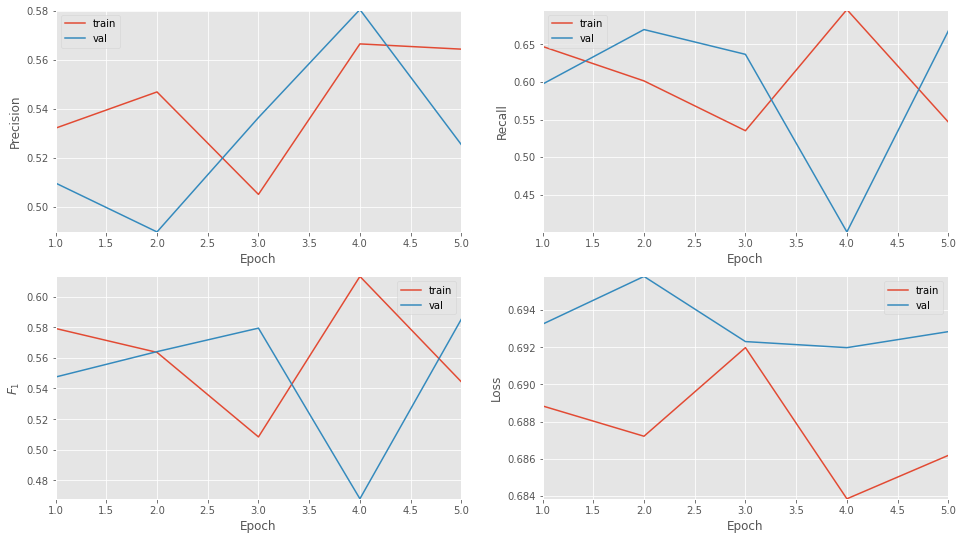

In [37]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metric(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    # TODO: what metrics are popular now?
    plot_metric(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metric(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metric(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metric(ax4, history.history['loss'], history.history['val_loss'], 'Loss')

    plt.show()

# create plot for current model
plot_history(history)


In [59]:
from sklearn.metrics import classification_report

# based on graphs above f1-best is 5th epoch
model.load_weights('models/cnn-frozen-embeddings-05-0.59.hdf5')

predicted = np.round(model.predict(x_test_seq))

In [60]:
predicted

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [61]:
threshold = 0.5
predicted_labels = predicted[:] # copy predict
predicted_labels[predicted > threshold] = 1
predicted_labels[predicted < threshold] = 0

# TODO: do not supress warnings
print(classification_report(y_test, predicted_labels, digits=5, zero_division=1))

              precision    recall  f1-score   support

           0    0.50388   0.54167   0.52209       120
           1    0.51327   0.47541   0.49362       122

    accuracy                        0.50826       242
   macro avg    0.50858   0.50854   0.50785       242
weighted avg    0.50861   0.50826   0.50774       242



In [62]:
from keras import optimizers

# make embedding layer trainable
model.layers[1].trainable = True
adam = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[precision, recall, f1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 8000, 200)    20000000    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 8000, 200)    0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 7999, 1)      401         dropout[0][0]                    
______________________________________________________________________________________________

In [63]:
checkpoint = ModelCheckpoint("models/cnn-trainable-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max')

history_trainable = model.fit(x_train_seq, y_train, batch_size=32, epochs=3, validation_split=0.25, callbacks = [checkpoint])

Epoch 1/3
23/23 [==============================] - 352s 15s/step - loss: 0.6922 - precision: 0.5025 - recall: 0.6266 - f1: 0.5526 - val_loss: 0.6914 - val_precision: 0.5368 - val_recall: 0.5896 - val_f1: 0.5590
Epoch 2/3
23/23 [==============================] - 328s 14s/step - loss: 0.6823 - precision: 0.5393 - recall: 0.5655 - f1: 0.5462 - val_loss: 0.6915 - val_precision: 0.5387 - val_recall: 0.6391 - val_f1: 0.5816
Epoch 3/3
23/23 [==============================] - 332s 14s/step - loss: 0.6861 - precision: 0.5409 - recall: 0.6099 - f1: 0.5677 - val_loss: 0.6912 - val_precision: 0.5417 - val_recall: 0.6538 - val_f1: 0.5887


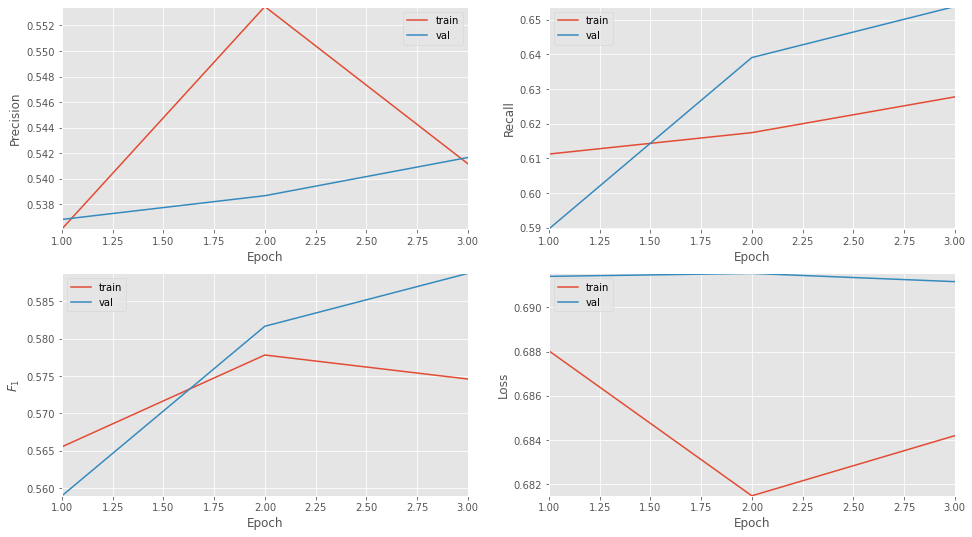

In [64]:
# create plot for current model
plot_history(history_trainable)

In [65]:
# prepare another embedding layer using Glove data

vocab_size = len(tokenizer.word_index) + 1

# load the whole embedding into memory
emb_index = dict()
with open('glove.6B.100d.txt') as f:
    for line in f:
        v = line.split()
        w = v[0]
        c = np.asarray(v[1:], dtype='float32')
        emb_index[w] = c

print('Loaded %s word vectors.' % len(emb_index))

# create a weight matrix for words in training data
emb_matrix = np.zeros((vocab_size, OUTPUT_DIM))

for word, i in tokenizer.word_index.items():
    emb_vector = emb_index.get(word)
    if emb_vector is not None:
        emb_matrix[i] = emb_vector

e = Embedding(vocab_size, OUTPUT_DIM, weights=[emb_matrix], input_length=SENTENCE_LENGTH, trainable=False)

Loaded 400000 word vectors.


In [68]:
# https://www.machinelearningmastery.ru/use-word-embedding-layers-deep-learning-keras/ 
# create another model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

# define model
cnn_model = Sequential()
cnn_model.add(e)
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
# compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precision, recall, f1, 'acc'])
# metrics=['acc'])
# summarize the model
print(cnn_model.summary())
# fit the model
#cnn_model.fit(x_train_seq, y_train, epochs=50, verbose=0)

# use 5 epoch just to be more fast
checkpoint1 = ModelCheckpoint("models_glove/cnn-frozen-embeddings-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max')
new_history = cnn_model.fit(x_train_seq, y_train, batch_size=32, epochs=5, validation_split=0.25, callbacks = [checkpoint1])

# evaluate the model
#new_loss, new_accuracy = cnn_model.evaluate(x_train_seq, y_train, verbose=0)
#print('Accuracy: %f' % (new_accuracy*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8000, 100)         368400    
_________________________________________________________________
flatten_2 (Flatten)          (None, 800000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 800001    
Total params: 1,168,401
Trainable params: 800,001
Non-trainable params: 368,400
_________________________________________________________________
None
Epoch 1/5
23/23 [==============================] - 2s 51ms/step - loss: 0.6907 - precision: 0.5089 - recall: 0.3759 - f1: 0.3693 - acc: 0.5085 - val_loss: 0.6752 - val_precision: 0.5495 - val_recall: 0.7656 - val_f1: 0.6383 - val_acc: 0.5744
Epoch 2/5
23/23 [==============================] - 1s 40ms/step - loss: 0.5765 - precision: 0.6986 - recall: 0.8082 - f1: 0

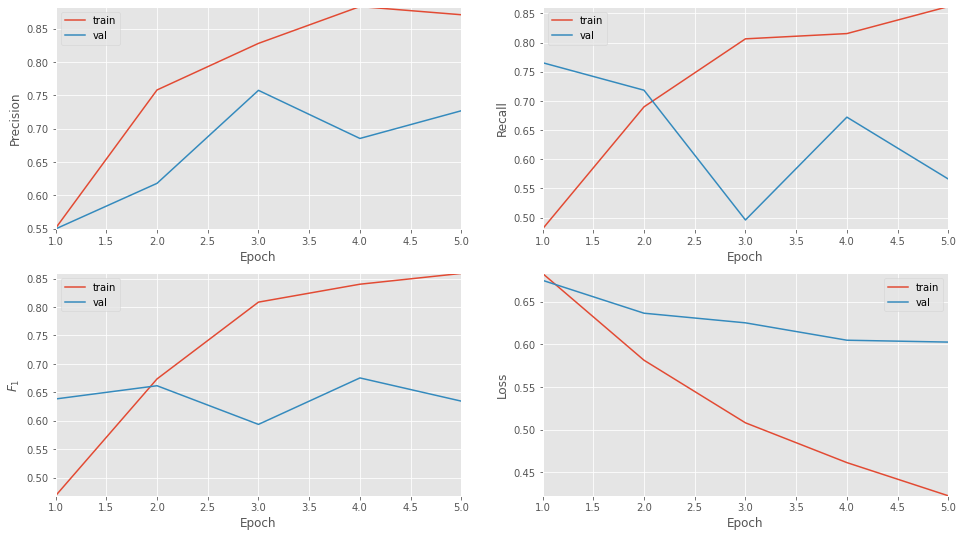

In [69]:
# create plot for new model
plot_history(new_history)

In [70]:
# based on graphs above f1-best is 5th epoch
cnn_model.load_weights('models_glove/cnn-frozen-embeddings-04-0.68.hdf5')

predicted1 = np.round(cnn_model.predict(x_test_seq))

In [73]:
# predicted1

In [72]:
# TODO: do not supress warnings
print(classification_report(y_test, predicted1, digits=5, zero_division=1))

              precision    recall  f1-score   support

           0    0.59091   0.75833   0.66423       120
           1    0.67045   0.48361   0.56190       122

    accuracy                        0.61983       242
   macro avg    0.63068   0.62097   0.61307       242
weighted avg    0.63101   0.61983   0.61265       242

